In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/data1"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/data1'.
There are 2 directories and 0 images in '/content/drive/MyDrive/data1/val'.
There are 0 directories and 320 images in '/content/drive/MyDrive/data1/val/CT_COVID'.
There are 0 directories and 325 images in '/content/drive/MyDrive/data1/val/CT_NonCOVID'.
There are 2 directories and 0 images in '/content/drive/MyDrive/data1/train'.
There are 0 directories and 1280 images in '/content/drive/MyDrive/data1/train/CT_COVID'.
There are 0 directories and 1300 images in '/content/drive/MyDrive/data1/train/CT_NonCOVID'.


In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/data1/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['CT_COVID' 'CT_NonCOVID']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
    # Setup target directory (we'llview images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # Show the shape of the image

    return img

Image shape: (211, 337, 3)


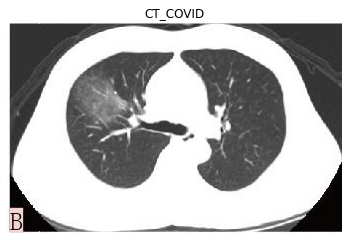

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/data1/train/",
                        target_class="CT_COVID")

## An end-to-end example

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/drive/MyDrive/data1/train"
test_dir = "/content/drive/MyDrive/data1/val"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Found 2580 images belonging to 2 classes.
Found 645 images belonging to 2 classes.


In [12]:
# Get a model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)       

In [14]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
162/162 [==============================] - 1151s 7s/step - loss: 0.6733 - accuracy: 0.5578 - val_loss: 0.6033 - val_accuracy: 0.6930
Epoch 2/10
162/162 [==============================] - 24s 151ms/step - loss: 0.5280 - accuracy: 0.7364 - val_loss: 0.4402 - val_accuracy: 0.8279
Epoch 3/10
162/162 [==============================] - 24s 151ms/step - loss: 0.4175 - accuracy: 0.8202 - val_loss: 0.3673 - val_accuracy: 0.8512
Epoch 4/10
162/162 [==============================] - 24s 149ms/step - loss: 0.3662 - accuracy: 0.8446 - val_loss: 0.3336 - val_accuracy: 0.8760
Epoch 5/10
162/162 [==============================] - 24s 149ms/step - loss: 0.3129 - accuracy: 0.8690 - val_loss: 0.3161 - val_accuracy: 0.8791
Epoch 6/10
162/162 [==============================] - 24s 150ms/step - loss: 0.2756 - accuracy: 0.8888 - val_loss: 0.3663 - val_accuracy: 0.8636
Epoch 7/10
162/162 [==============================] - 24s 150ms/step - loss: 0.2442 - accuracy: 0.9004 - val_loss: 0.3391 - val_acc

In [16]:
model_1.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


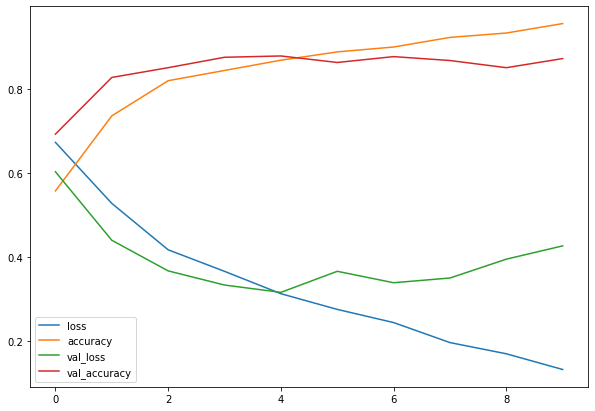

In [15]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

## Data Augmentation

In [17]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image? 

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [18]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 2580 images belonging to 2 classes.
Non-augmented training data:
Found 2580 images belonging to 2 classes.
Non-augmented test data:
Found 645 images belonging to 2 classes.


In [19]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 18


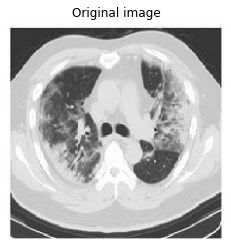

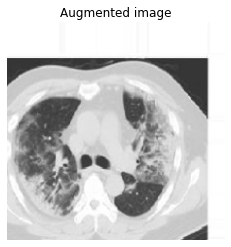

In [20]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [21]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [22]:
# Create the model (same as model_5)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
81/81 [==============================] - 50s 602ms/step - loss: 0.7484 - accuracy: 0.4733 - val_loss: 0.6920 - val_accuracy: 0.5473
Epoch 2/5
81/81 [==============================] - 49s 603ms/step - loss: 0.6930 - accuracy: 0.4876 - val_loss: 0.6914 - val_accuracy: 0.5163
Epoch 3/5
81/81 [==============================] - 49s 603ms/step - loss: 0.6939 - accuracy: 0.5171 - val_loss: 0.6909 - val_accuracy: 0.5798
Epoch 4/5
81/81 [==============================] - 49s 603ms/step - loss: 0.6932 - accuracy: 0.4589 - val_loss: 0.6904 - val_accuracy: 0.5628
Epoch 5/5
81/81 [==============================] - 49s 599ms/step - loss: 0.6917 - accuracy: 0.5109 - val_loss: 0.6882 - val_accuracy: 0.5829


In [23]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

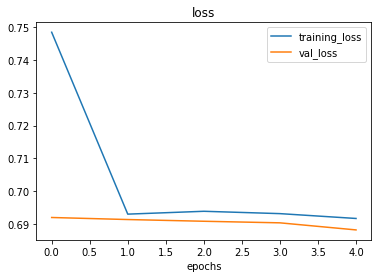

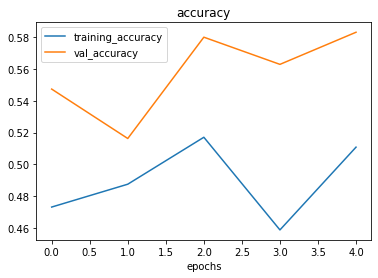

In [24]:
# Check model's performance history training on augmented data
plot_loss_curves(history_2)

🤔 **Question: Why didn't our model get very good results on the training set to begin with?**

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

In [25]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 2580 images belonging to 2 classes.


In [26]:
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
81/81 [==============================] - 49s 603ms/step - loss: 0.6916 - accuracy: 0.5194 - val_loss: 0.6706 - val_accuracy: 0.6574
Epoch 2/5
81/81 [==============================] - 48s 598ms/step - loss: 0.6818 - accuracy: 0.5636 - val_loss: 0.6714 - val_accuracy: 0.5101
Epoch 3/5
81/81 [==============================] - 49s 601ms/step - loss: 0.6648 - accuracy: 0.6012 - val_loss: 0.6128 - val_accuracy: 0.6868
Epoch 4/5
81/81 [==============================] - 49s 605ms/step - loss: 0.6517 - accuracy: 0.6058 - val_loss: 0.6088 - val_accuracy: 0.7302
Epoch 5/5
81/81 [==============================] - 49s 602ms/step - loss: 0.6322 - accuracy: 0.6492 - val_loss: 0.5972 - val_accuracy: 0.6651


In [27]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

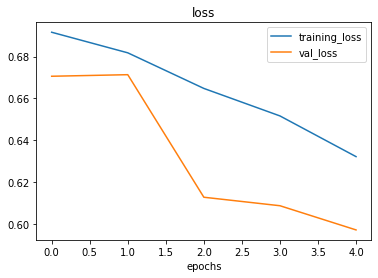

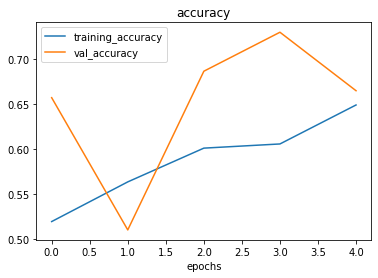

In [28]:
# Plot loss curves
plot_loss_curves(history_3)

## First Model (Tiny VGG)

In [29]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 26, 26, 10)       

In [30]:
# Compile our CNN
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
81/81 [==============================] - 51s 621ms/step - loss: 0.6938 - accuracy: 0.5240 - val_loss: 0.6866 - val_accuracy: 0.5411
Epoch 2/5
81/81 [==============================] - 50s 618ms/step - loss: 0.6832 - accuracy: 0.5628 - val_loss: 0.6702 - val_accuracy: 0.5178
Epoch 3/5
81/81 [==============================] - 50s 621ms/step - loss: 0.6607 - accuracy: 0.6143 - val_loss: 0.6105 - val_accuracy: 0.7209
Epoch 4/5
81/81 [==============================] - 51s 624ms/step - loss: 0.6387 - accuracy: 0.6589 - val_loss: 0.5413 - val_accuracy: 0.8171
Epoch 5/5
81/81 [==============================] - 50s 621ms/step - loss: 0.6087 - accuracy: 0.6779 - val_loss: 0.5079 - val_accuracy: 0.7845


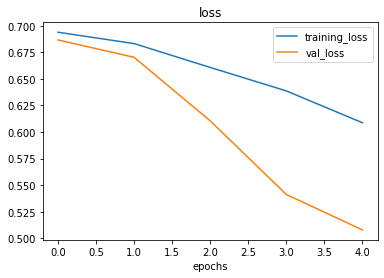

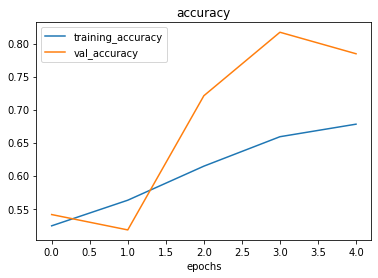

In [31]:
# Check out the TinyVGG model performance
plot_loss_curves(history_4)

## Prediction

In [32]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into (224,224,3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [33]:
# Load in and preprocess our custom image
covid = load_and_prep_image("covid.png")
covid

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.9966299 , 0.9966299 , 0.9966299 ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.6052696 , 0.6052696 , 0.6052696 ],
        [0.843076  , 0.843076  , 0.843076  ],
        [0.9972426 , 0.9972426 , 0.9972426 ]],

       [[0.9995035 , 0.9995035 , 0.9995035 ],
        [1.        , 1.        , 1.        ],
        [0.9741375 , 0.9741375 , 0.9741375 ],
        ...,
        [0.2998832 , 0.2998832 , 0.2998832 ],
        [0.71543545, 0.71543545, 0.71543545],
        [0.99536175, 0.99536175, 0.99536175]],

       [[0.9966715 , 0.9966715 , 0.9966715 ],
        [0.9863161 , 0.9863161 , 0.9863161 ],
        [0.9842314 , 0.9842314 , 0.9842314 ],
        ...,
        [0.22363555, 0.22363555, 0.22363555],
        [0.67618495, 0.67618495, 0.67618495],
        [0.99753314, 0.99753314, 0.99753314]],

       ...,

       [[0.9991725 , 0.9991725 , 0.9991725 ],
        [1.  

In [34]:
# Add an extra axis
print(f"Shape before new dimension: {covid.shape}")
covid = tf.expand_dims(covid, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {covid.shape}")
covid

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.9966299 , 0.9966299 , 0.9966299 ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.6052696 , 0.6052696 , 0.6052696 ],
         [0.843076  , 0.843076  , 0.843076  ],
         [0.9972426 , 0.9972426 , 0.9972426 ]],

        [[0.9995035 , 0.9995035 , 0.9995035 ],
         [1.        , 1.        , 1.        ],
         [0.9741375 , 0.9741375 , 0.9741375 ],
         ...,
         [0.2998832 , 0.2998832 , 0.2998832 ],
         [0.71543545, 0.71543545, 0.71543545],
         [0.99536175, 0.99536175, 0.99536175]],

        [[0.9966715 , 0.9966715 , 0.9966715 ],
         [0.9863161 , 0.9863161 , 0.9863161 ],
         [0.9842314 , 0.9842314 , 0.9842314 ],
         ...,
         [0.22363555, 0.22363555, 0.22363555],
         [0.67618495, 0.67618495, 0.67618495],
         [0.99753314, 0.99753314, 0.99753314]],

        ...,

        [[0.9991725 , 0.9991725 , 

In [35]:
# Make a prediction on custom image tensor
pred = model_1.predict(covid)
pred

array([[0.000951]], dtype=float32)

In [36]:
# Remind ourselves of our class names
class_names

array(['CT_COVID', 'CT_NonCOVID'], dtype='<U11')

In [37]:
# We can index the predicted class by rounding the prediction probability
pred_round = int(tf.round(pred))
if pred_round == 1:
  pred_class = "NonCovid"
else:
  pred_class = "Covid"
pred_class

'Covid'

In [38]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_round = int(tf.round(pred))
  if pred_round == 1:
    pred_class = "NonCovid"
  else:
    pred_class = "Covid"

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

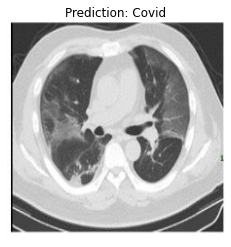

In [39]:
# Test our model on a custom image
pred_and_plot(model_1, "covid.png", class_names)

## Transfer Learning with Tensorflow Part 1: Feature Extraction

In [40]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# EfficientNet0 feature vector
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [41]:
# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url(str): A TensorFlow Hub feature extraction URL.
    num_classes(int): Number of output neurons in the output layer, 
      should be equal to number of target classes, default = 10

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor 
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,   # freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))  # define the input image shape
  
  # Create our image model
  model = tf.keras.Sequential([
     feature_extractor_layer,    # use the feature extraction layer as the base
     layers.Dense(1, activation="sigmoid", name="output_layer")   # create our own output layer
  ])
  return model

In [42]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 16
resnet_model = create_model(resnet_url,
                            num_classes=2)
# Compile
resnet_model.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [43]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 1)                 2049      
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [44]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/10
81/81 [==============================] - 34s 349ms/step - loss: 0.7777 - accuracy: 0.5422 - val_loss: 0.5977 - val_accuracy: 0.6543
Epoch 2/10
81/81 [==============================] - 26s 321ms/step - loss: 0.6309 - accuracy: 0.6624 - val_loss: 0.5770 - val_accuracy: 0.6512
Epoch 3/10
81/81 [==============================] - 26s 319ms/step - loss: 0.6242 - accuracy: 0.6589 - val_loss: 0.5077 - val_accuracy: 0.7659
Epoch 4/10
81/81 [==============================] - 26s 319ms/step - loss: 0.5584 - accuracy: 0.7058 - val_loss: 0.5301 - val_accuracy: 0.7132
Epoch 5/10
81/81 [==============================] - 26s 318ms/step - loss: 0.5793 - accuracy: 0.6899 - val_loss: 0.4593 - val_accuracy: 0.7938
Epoch 6/10
81/81 [==============================] - 26s 318ms/step - loss: 0.5104 - accuracy: 0.7469 - val_loss: 0.4529 - val_accuracy: 0.7984
Epoch 7/10
81/81 [==============================] - 26s 315ms/step - loss: 0.5102 - accuracy: 0.7477 - val_loss: 0.4477 - val_accuracy: 0.7860

In [45]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=2)

# Compile EfficientNet model
efficientnet_model.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=10, # train for 10 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/10
81/81 [==============================] - 36s 320ms/step - loss: 0.7136 - accuracy: 0.5264 - val_loss: 0.6209 - val_accuracy: 0.6574
Epoch 2/10
81/81 [==============================] - 24s 297ms/step - loss: 0.6072 - accuracy: 0.6744 - val_loss: 0.5734 - val_accuracy: 0.7054
Epoch 3/10
81/81 [==============================] - 24s 296ms/step - loss: 0.5908 - accuracy: 0.6926 - val_loss: 0.5186 - val_accuracy: 0.7643
Epoch 4/10
81/81 [==============================] - 24s 295ms/step - loss: 0.5395 - accuracy: 0.7407 - val_loss: 0.5011 - val_accuracy: 0.7721
Epoch 5/10
81/81 [==============================] - 24s 294ms/step - loss: 0.5429 - accuracy: 0.7329 - val_loss: 0.5089 - val_accuracy: 0.7504
Epoch 6/10
81/81 [==============================] - 24s 297ms/step - loss: 0.5142 - accuracy: 0.7543 - val_loss: 0.4768 - val_accuracy: 0.7829
Epoch 7/10
81/81 [==============================] - 24s 293ms/step - loss: 0.5099 - accuracy: 0.7481 - val_loss: 0.4599 - val_accuracy: 0.8047

In [46]:
efficientnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1281      
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________
